In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams["figure.figsize"] = (10,5)


# Dados de exemplo
X = np.array([[1], [2], [3], [4], [5],[6],[7],[8],[9],[10],[11]])
y = np.array([2, 4, 6, 8, 10, 12, 13, 13.5, 13, 11, 9])


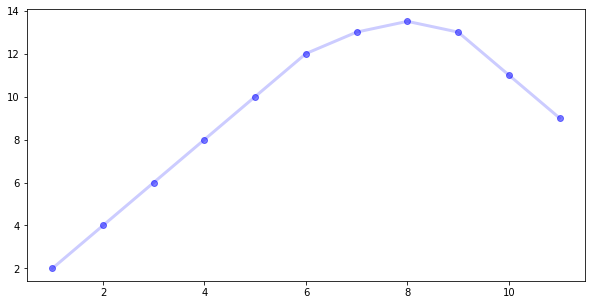

In [6]:
#dados não lineares para melhor teste do algoritmo

plt.scatter(X, y, c="blue", alpha=0.5)
plt.plot(X, y, alpha=0.2,linewidth=3,color="blue")

plt.show()

#### Skratch

In [7]:
def gradient_boosting(learning_rate,n_estimators,max_depth):

    global p_inf,rms

    # Inicialize as previsões com a média dos rótulos
    p0 = np.full(y.shape, np.mean(y))

    p_inf=p0

    for i in range(n_estimators):
        # Calcule os resíduos
        residuals = y - p_inf

        # Crie um estimador base (árvore de decisão, por exemplo) - a atualização de pesos ocorre com a variação dos residuos
        estimator = DecisionTreeRegressor(max_depth=max_depth)
        estimator.fit(X, residuals)

        # Faça previsões usando o estimador base
        tree_predictions = estimator.predict(X)

        # Atualize as previsões com um fator de aprendizado
        p_inf += learning_rate * tree_predictions

        # RMSE
        rms = mean_squared_error(y, p_inf)

    return p_inf

In [8]:
gradient_boosting(learning_rate=0.1,n_estimators=100,max_depth=1)
print("RMSE GB from skratch:",rms)

RMSE GB from skratch: 0.07300035907809053


#### GB Sklearn

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

sklearn_gbm = GradientBoostingRegressor(n_estimators =50, learning_rate=0.3, max_depth=1)
sklearn_gbm.fit(X,y)
pred_gbm=sklearn_gbm.predict(X)
rms_gbm=mean_squared_error(y, sklearn_gbm.predict(X))

print("RMSE GB from skratch:",rms_gbm)

RMSE GB from skratch: 0.019125253948800217


#### Versus

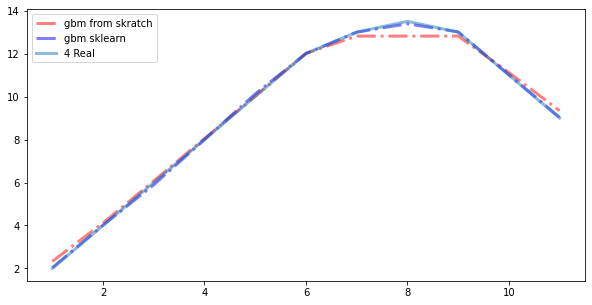

In [12]:
plt.plot(X, pd.DataFrame(p_inf), '-.',label='gbm from skratch', alpha=0.5,color="red",linewidth=3)
plt.plot(X, pd.DataFrame(pred_gbm), '-.',label='gbm sklearn', alpha=0.5,color="blue",linewidth=3)
plt.plot(X, pd.DataFrame(y),label='4 Real', alpha=0.5,linewidth=3)


plt.rcParams["figure.figsize"] = (10,5)
plt.legend()
plt.show()

In [118]:
# pq o gradient boosting from skratch para igualar o rmse do sklearn, tem que ter mais interações, sendo que o loss function (mse) é o mesmo

# https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py <- dissecar até entender o pq
